## Load Data

In [1]:
import numpy as np

# load previously fitted DTIs
tensor_file_hr = np.load('tensors_hr.npz')
tensor_file_lr = np.load('tensors_lr.npz')

# get evals
evals_hr = tensor_file_hr['evals_hr']
evals_lr = tensor_file_lr['evals_lr']

# get evecs
evecs_hr = tensor_file_hr['evecs_hr']
evecs_lr = tensor_file_lr['evecs_lr']

In [2]:
from dipy.reconst.dti import fractional_anisotropy, color_fa

# hr
FA_hr = fractional_anisotropy(evals_hr)
FA_hr[np.isnan(FA_hr)] = 0

FA_hr = np.clip(FA_hr, 0, 1)
RGB_hr = color_fa(FA_hr, evecs_hr)

# lr
FA_lr = fractional_anisotropy(evals_lr)
FA_lr[np.isnan(FA_lr)] = 0

FA_lr = np.clip(FA_lr, 0, 1)
RGB_lr = color_fa(FA_lr, evecs_lr)

## Visualisation by ellipsoids

In [3]:
from IPython.display import Image
from dipy.data import get_sphere

sphere = get_sphere('repulsion724')

from dipy.viz import window, actor

# Enables/disables interactive visualization
interactive = False

scene = window.Scene()

In [4]:
cfa_hr = RGB_hr
cfa_hr /= cfa_hr.max()

scene.add(actor.tensor_slicer(evals_hr, evecs_hr, scalar_colors=cfa_hr, sphere=sphere,
                              scale=0.3))

window.record(scene, n_frames=1, out_path='tensor_ellipsoids_hr.png',
              size=(1200, 1200))
if interactive:
    window.show(scene)

In [5]:
scene.clear()

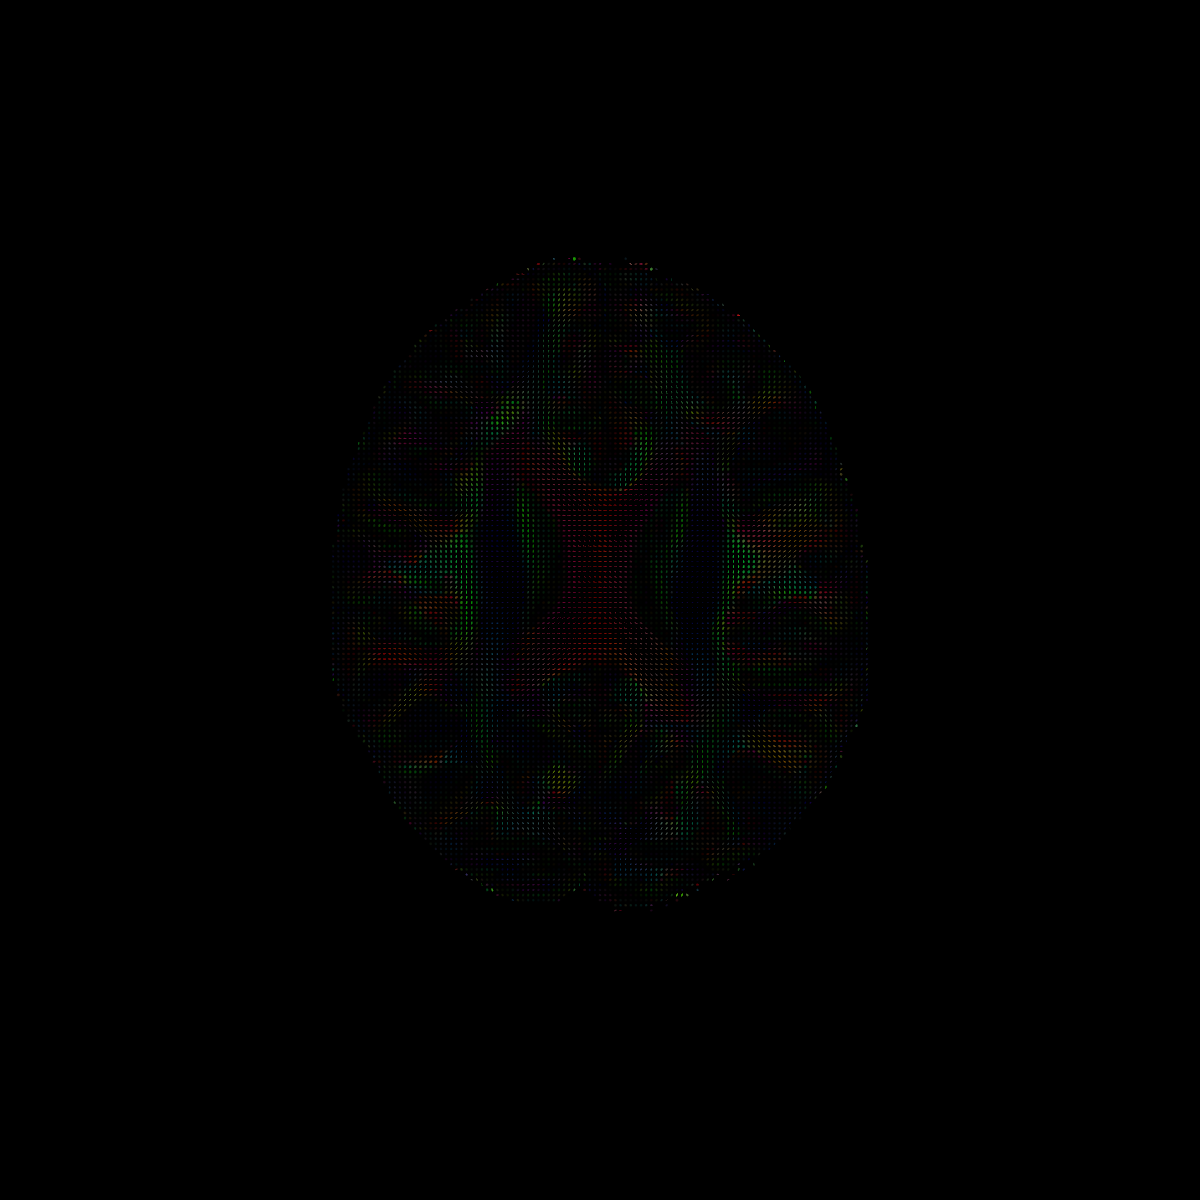

In [6]:
Image('tensor_ellipsoids_hr.png')

In [7]:
# lr
cfa_lr = RGB_lr
cfa_lr /= cfa_lr.max()

scene.add(actor.tensor_slicer(evals_lr, evecs_lr, scalar_colors=cfa_lr, sphere=sphere,
                              scale=0.3))

window.record(scene, n_frames=1, out_path='tensor_ellipsoids_lr.png',
              size=(1200, 1200))
if interactive:
    window.show(scene)

In [8]:
scene.clear()

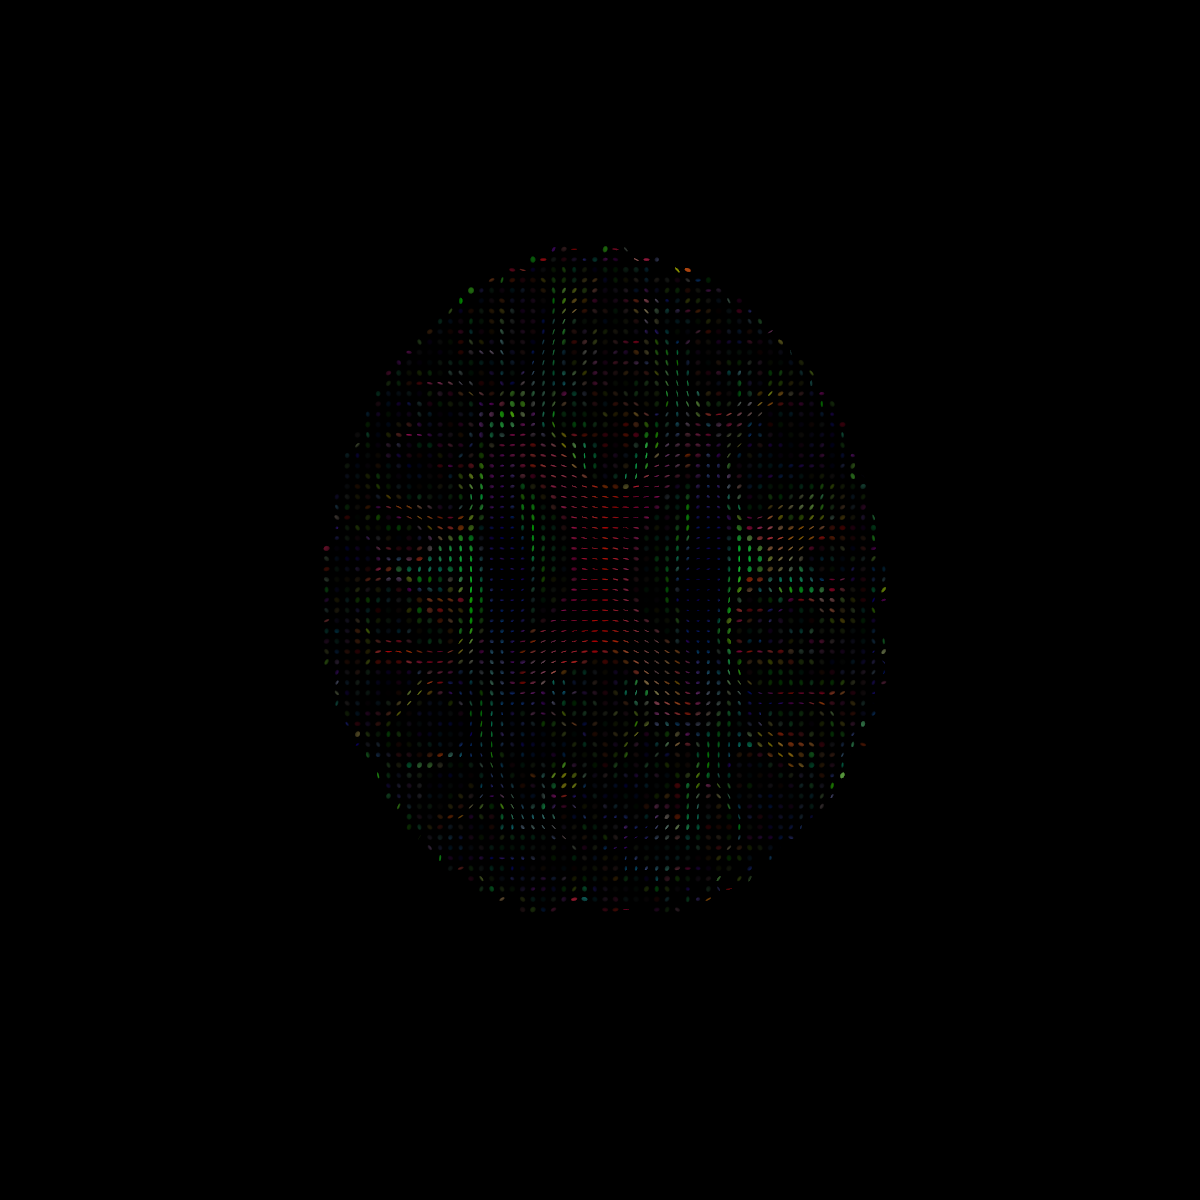

In [9]:
Image('tensor_ellipsoids_lr.png')